<a href="https://colab.research.google.com/github/armandomacri/Skin-Lesion-CNN/blob/main/I_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%run "drive/Shareddrives/CIDL Project/Macrì,Tortora/Utilities.ipynb"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.3 MB/s 


In [ ]:
# this jupyter extension will print out the running time of cell executions
!pip install -q ipython-autotime
%load_ext autotime

time: 222 µs (started: 2022-06-23 14:08:21 +00:00)


## Import Libraries
First of all, let's import all the libraries we will need later.

In [ ]:
import os
import numpy as np
import random as rn
import tensorflow as tf
from tensorflow import keras as ks
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers, models, optimizers, regularizers
from keras.models import Model
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from tqdm.auto import tqdm
import numpy as np

set_seed()

time: 11 ms (started: 2022-06-23 14:08:21 +00:00)


## Load Dataset from Google Drive

In [ ]:
%run '/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/Utilities.ipynb'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 8.2 s (started: 2022-06-23 14:08:21 +00:00)


In [ ]:
!unzip -q "/content/drive/Shareddrives/CIDL Project/data/split.zip" -d "/content"

time: 33.8 s (started: 2022-06-23 14:08:29 +00:00)


## Set Parameters

In [ ]:
LOCAL_MODELS_FOLDER = "/content/models"
GLOBAL_MODELS_FOLDER = "/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models"

# Default values to load the dataset
BATCH_SIZE = 32
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

root_dir = 'split'
test_dir = os.path.join(root_dir, 'test')
val_dir = os.path.join(root_dir, 'val')
training_dir = os.path.join(root_dir, 'train')

class_weights = compute_class_weights(training_dir)

time: 295 ms (started: 2022-06-23 14:09:03 +00:00)


In [ ]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
                      test_dir,
                      label_mode="categorical",
                      labels="inferred",
                      shuffle=False,
                      image_size=(224, 224),
                      batch_size=BATCH_SIZE)

val_dataset = tf.keras.utils.image_dataset_from_directory(
                      val_dir,
                      label_mode="categorical",
                      labels="inferred",
                      shuffle=False,
                      image_size=(224, 224),
                      batch_size=BATCH_SIZE)

train_dataset = tf.keras.utils.image_dataset_from_directory(
                      training_dir,
                      label_mode="categorical",
                      labels="inferred",
                      shuffle=True,
                      image_size=(224, 224),
                      batch_size=BATCH_SIZE)

Found 2540 files belonging to 8 classes.
Found 2529 files belonging to 8 classes.
Found 14475 files belonging to 8 classes.
time: 5.11 s (started: 2022-06-23 14:09:03 +00:00)


## Load Dataset

## Load Training

In [ ]:
train_dataset300x300 = tf.keras.utils.image_dataset_from_directory(
                      training_dir,
                      label_mode="categorical",
                      labels="inferred",
                      shuffle=True,
                      image_size=(300, 300),
                      batch_size=BATCH_SIZE)

train_dataset299x299 = tf.keras.utils.image_dataset_from_directory(
                      training_dir,
                      label_mode="categorical",
                      labels="inferred",
                      shuffle=True,
                      image_size=(299, 299),
                      batch_size=BATCH_SIZE)

train_dataset224x224 = tf.keras.utils.image_dataset_from_directory(
                      training_dir,
                      label_mode="categorical",
                      labels="inferred",
                      shuffle=True,
                      image_size=(224, 224),
                      batch_size=BATCH_SIZE)



train_dataset = tf.data.Dataset.from_tensor_slices(({"input_3":[train_dataset300x300], 
                                               "input_2":[train_dataset299x299], 
                                               "input_1":[train_dataset224x224]}, [[3]]))

Found 14475 files belonging to 8 classes.
Found 14475 files belonging to 8 classes.
Found 14475 files belonging to 8 classes.
time: 1.94 s (started: 2022-06-23 12:38:55 +00:00)


## Load validation

In [ ]:
val_dataset224x224 = tf.keras.utils.image_dataset_from_directory(
                      val_dir,
                      label_mode="categorical",
                      labels="inferred",
                      shuffle=False,
                      image_size=(224, 224),
                      batch_size=BATCH_SIZE)

#inception
val_dataset299x299 = tf.keras.utils.image_dataset_from_directory(
                      val_dir,
                      label_mode="categorical",
                      labels="inferred",
                      shuffle=False,
                      image_size=(299, 299),
                      batch_size=BATCH_SIZE)

#from scatch
val_dataset300x300 = tf.keras.utils.image_dataset_from_directory(
                      val_dir,
                      label_mode="categorical",
                      labels="inferred",
                      shuffle=False,
                      image_size=(300, 300),
                      batch_size=BATCH_SIZE)


val_dataset = tf.data.Dataset.from_tensor_slices(({"input_3":[val_dataset300x300], 
                                               "input_2":[val_dataset299x299], 
                                               "input_1":[val_dataset224x224]}, [[3]]))

Found 2529 files belonging to 8 classes.
Found 2529 files belonging to 8 classes.
Found 2529 files belonging to 8 classes.
time: 373 ms (started: 2022-06-23 12:38:57 +00:00)


## Load test

In [ ]:
test_dataset224x224 = tf.keras.utils.image_dataset_from_directory(
                      test_dir,
                      label_mode="categorical",
                      labels="inferred",
                      shuffle=False,
                      image_size=(224, 224),
                      batch_size=BATCH_SIZE)

Found 2540 files belonging to 8 classes.
time: 127 ms (started: 2022-06-23 12:38:57 +00:00)


In [ ]:
#inception
test_dataset299x299 = tf.keras.utils.image_dataset_from_directory(
                      test_dir,
                      label_mode="categorical",
                      labels="inferred",
                      shuffle=False,
                      image_size=(299, 299),
                      batch_size=BATCH_SIZE)

Found 2540 files belonging to 8 classes.
time: 129 ms (started: 2022-06-23 12:38:57 +00:00)


In [ ]:
#from scatch
test_dataset300x300 = tf.keras.utils.image_dataset_from_directory(
                      test_dir,
                      label_mode="categorical",
                      labels="inferred",
                      shuffle=False,
                      image_size=(300, 300),
                      batch_size=BATCH_SIZE)

Found 2540 files belonging to 8 classes.
time: 130 ms (started: 2022-06-23 12:38:57 +00:00)


# Compute predictions
With the purpose of creating an ensemble model, we store the prediction of all the models.

## Test Predictions

In [ ]:
models_name = os.listdir(GLOBAL_MODELS_FOLDER)
models_predictions = []

for model_name in models_name:
  models = os.listdir(os.path.join(GLOBAL_MODELS_FOLDER, model_name))
  if model_name == 'CNN_From_Scratch':
    test = test_dataset300x300
  elif model_name == 'InceptionV3':
    test = test_dataset299x299
  else:
    test = test_dataset224x224
  for m in models:
    if m.endswith('.h5'):
      print(m)
      model = tf.keras.models.load_model(os.path.join(GLOBAL_MODELS_FOLDER, model_name, m))
      models_predictions.append(model.predict(test))

models_predictions = np.array(models_predictions)
np.save('/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/test_predictions.npy', models_predictions, allow_pickle=True)

experiment_1_final.h5
experiment_1.h5
experiment_4.h5
experiment_5.h5
experiment_6.h5
experiment_01.h5
experiment_8.h5
experiment_7.h5
experiment_10.h5
experiment_3_sgd.h5
experiment_3_rmsprop.h5
experiment_2.h5
experiment_3.h5
experiment_001.h5
experiment_1.1.h5
experiment_inception.h5
ResNet50_experiment6.h5
ResNet50_experiment0.h5
ResNet50_experiment0_1.h5
ResNet50_experiment1.h5
ResNet50_experiment2.h5
ResNet50_experiment2_1.h5
ResNet50_experiment3.h5
ResNet50_experiment4.h5
ResNet50_experiment4_1.h5
ResNet50_experiment4_2.h5
ResNet50_finetuning1.h5
ResNet50_finetuning2.h5
ResNet50_finetuning3.h5
ResNet50_finetuning6.h5
ResNet50_finetuning7.h5
ResNet50_finetuning8.h5
ResNet50_finetuning9.h5
ResNet50_finetuning5.h5
ResNet50_finetuning4.h5
Inception_1.h5
Inception_2.h5
Inception_3.h5
Inception_4.h5
Inception_6.h5
Inception_6_finetuning.h5
Inception_8_finetuning.h5
Inception_5.h5
Inception_7_finetuning.h5
Inception_7.h5
Inception_1_finetuning.h5
Inception_2_finetuning.h5
Inception_3_f

## Validation Predictions

In [ ]:
models_name = os.listdir(GLOBAL_MODELS_FOLDER)
models_predictions = []

for model_name in models_name:
  models = os.listdir(os.path.join(GLOBAL_MODELS_FOLDER, model_name))
  if model_name == 'CNN_From_Scratch':
    val = val_dataset300x300
  elif model_name == 'InceptionV3':
    val = val_dataset299x299
  else:
    val = val_dataset224x224
  for m in models:
    if m.endswith('.h5'):
      print(m)
      model = tf.keras.models.load_model(os.path.join(GLOBAL_MODELS_FOLDER, model_name, m))
      models_predictions.append(model.predict(val))

models_predictions = np.array(models_predictions)
np.save('/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/validation_predictions.npy', models_predictions, allow_pickle=True)

CNN_From_Scratch
experiment_1_final.h5
experiment_1.h5
experiment_4.h5
experiment_5.h5
experiment_6.h5
experiment_01.h5
experiment_8.h5
experiment_7.h5
experiment_10.h5
experiment_3_sgd.h5
experiment_3_rmsprop.h5
experiment_2.h5
experiment_3.h5
experiment_001.h5
experiment_1.1.h5
experiment_inception.h5
.ipynb_checkpoints
ResNet50
ResNet50_experiment6.h5
ResNet50_experiment0.h5
ResNet50_experiment0_1.h5
ResNet50_experiment1.h5
ResNet50_experiment2.h5
ResNet50_experiment2_1.h5
ResNet50_experiment3.h5
ResNet50_experiment4.h5
ResNet50_experiment4_1.h5
ResNet50_experiment4_2.h5
ResNet50_finetuning1.h5
ResNet50_finetuning2.h5
ResNet50_finetuning3.h5
ResNet50_finetuning6.h5
ResNet50_finetuning7.h5
ResNet50_finetuning8.h5
ResNet50_finetuning9.h5
ResNet50_finetuning5.h5
ResNet50_finetuning4.h5
InceptionV3
Inception_1.h5
Inception_2.h5
Inception_3.h5
Inception_4.h5
Inception_6.h5
Inception_6_finetuning.h5
Inception_8_finetuning.h5
Inception_5.h5
Inception_7_finetuning.h5
Inception_7.h5
Inceptio

#Load Predictions

In [ ]:
test_predictions = np.load('/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/test_predictions.npy')
n_models = len(test_predictions)
n_models

119

time: 1.88 s (started: 2022-06-23 12:38:58 +00:00)


In [ ]:
validation_predictions = np.load('/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/validation_predictions.npy')
n_models = len(validation_predictions)
n_models

119

time: 2.74 s (started: 2022-06-23 12:38:59 +00:00)


#Evaluate Ensemble

In [ ]:
def evaluate_ensemble(pred_Y):  ###ok

  y_true = tf.concat([labels_batch for data_batch, labels_batch in test_dataset], axis = 0)
  y_true_cat = np.argmax(y_true, -1)

  pred_Y_cat = np.argmax(pred_Y, -1)

  print(classification_report(y_true_cat, pred_Y_cat, digits=4))

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

  sns.heatmap(confusion_matrix(y_true_cat, pred_Y_cat), 
              annot=True, fmt="d", cbar = False, cmap = plt.cm.Blues, ax=ax1)

  class_label=['AK', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'SCC', 'VASC']
  num_classes=len(class_label)
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(num_classes):
      fpr[i], tpr[i], _ = roc_curve(y_true[:, i], pred_Y[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
  colors = ['b','g','r','c','m','y','orange','darkgreen']
  for i, color in zip(range(num_classes), colors):
      ax2.plot(fpr[i], tpr[i], color=color, lw=1.5,
              label='ROC curve of class %s (AUC = {%0.2f})'%(class_label[i], roc_auc[i]))
  ax2.plot([0, 1], [0, 1], 'k--', lw=1.5)
  ax2.set_xlim([-0.05, 1.0])
  ax2.set_ylim([0.0, 1.05])
  ax2.set_xlabel('False Positive Rate')
  ax2.set_ylabel('True Positive Rate')
  ax2.title.set_text('Receiver operating characteristic for multi-class data')
  ax2.legend(loc="lower right")
  ax2.grid()

time: 43 ms (started: 2022-06-23 12:39:02 +00:00)


# Average Voting Ensemble

In [ ]:
total_contributes = 1/n_models*test_predictions.sum(axis=0)

time: 5.73 ms (started: 2022-06-22 13:36:18 +00:00)


In [ ]:
print(total_contributes.shape)

(2540, 8)
time: 1.29 ms (started: 2022-06-22 13:36:19 +00:00)


              precision    recall  f1-score   support

           0     0.5556    0.7386    0.6341        88
           1     0.7507    0.8408    0.7932       333
           2     0.5972    0.6426    0.6190       263
           3     0.6538    0.6800    0.6667        25
           4     0.6474    0.6689    0.6580       453
           5     0.9025    0.8191    0.8588      1288
           6     0.5211    0.5781    0.5481        64
           7     0.5758    0.7308    0.6441        26

    accuracy                         0.7657      2540
   macro avg     0.6505    0.7124    0.6778      2540
weighted avg     0.7781    0.7657    0.7698      2540



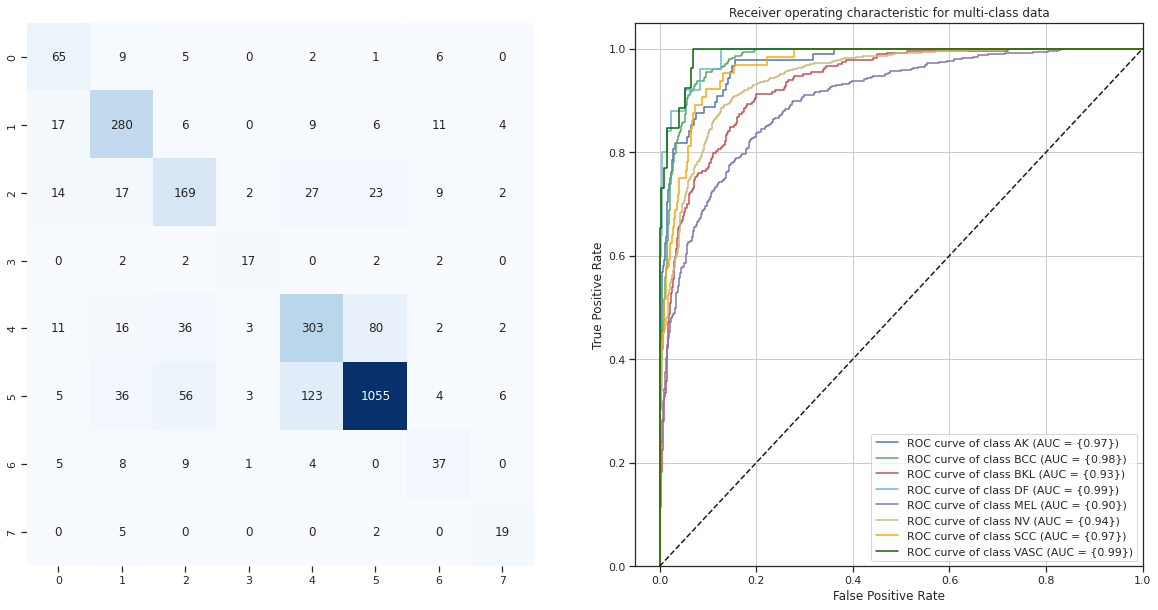

time: 5.51 s (started: 2022-06-22 13:36:19 +00:00)


In [ ]:
evaluate_ensemble(total_contributes)

# Weighted Average Ensemble
https://github.com/ethen8181/machine-learning/blob/master/ga/ga.ipynb

## test fitness function

In [ ]:
def weighted_average_scores(models_scores, weights):
  if len(weights) != len(models_scores):
    return
  weighted_scores = []
  for i in range(n_models):
    weighted_scores.append(models_scores[i]*weights[i])

  weighted_scores = np.array(weighted_scores).sum(axis=0)
  return weighted_scores

time: 3.29 ms (started: 2022-06-23 13:44:04 +00:00)


In [ ]:
def compute_weighted_result(weights):
  y_true = tf.concat([labels_batch for data_batch, labels_batch in test_dataset], axis = 0)
  y_true_cat = np.argmax(y_true, -1)
  weighted_scores = weighted_average_scores(test_predictions, weights)
  weighted_scores = weighted_scores.sum(axis=0)
  predictions = np.argmax(weighted_scores, -1)
  return metrics.f1_score(y_true_cat, predictions, average="weighted")

time: 4.28 ms (started: 2022-06-23 13:44:04 +00:00)


## GA to learn the best parameters

In [ ]:
POPULATION_SIZE = 10 # number of individuals
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.2   # probability for mutating an individual
MAX_GENERATIONS = 100

time: 1.67 ms (started: 2022-06-23 08:25:12 +00:00)


In [ ]:
from collections import namedtuple
import random

class GA:
  """
	Genetic Algorithm for a simple optimization problem
	Parameters
	----------
	generation : int
		number of iteration to train the algorithm
	pop_size : int
		number of chromosomes in the population
	chromo_size : int
		number of possible values (genes) per chromosome
	low, high : int
		lower_bound and upper_bound possible value of the randomly generated chromosome
	retain_rate : float 0 ~ 1
		the fraction of the best chromosome to retain. used to mate
		the children for the next generation
	mutate_rate : float 0 ~ 1
		the probability that each chromosome will mutate
	"""

  def __init__(self, generation, pop_size, chromo_size, low, high, retain_rate, mutate_rate, data):
    self.low  = low
    self.high = high
    self.pop_size = pop_size
    self.chromo_size = chromo_size
    self.generation  = generation
    self.retain_len  = int(pop_size * retain_rate)
    self.mutate_rate = mutate_rate
    self.info = namedtuple('info', ['cost', 'chromo'])
    self.data = data
    y_true = tf.concat([labels_batch for data_batch, labels_batch in val_dataset], axis = 0)
    y_true_cat = np.argmax(y_true, -1)
    print(y_true_cat)
    self.y_true_cat = y_true_cat

  def fit(self, target):
    """
    target : int
      the targeted solution
		"""
    # randomly generate the initial population, and evaluate its cost
    array_size = (self.pop_size, self.chromo_size)

    pop = np.random.uniform(low=self.low, high=self.high, size=array_size)
    for i in range(len(pop)):
      pop[i] = pop[i]/sum(pop)
    graded_pop = self._compute_cost( pop, target )

    
    # store the best chromosome and its cost for each generation,
    # so we can get an idea of when the algorithm converged
    self.generation_history = []
    for _ in range(self.generation):
      graded_pop, generation_best = self._evolve(graded_pop, target)
      self.generation_history.append(generation_best)
    
    self.best = self.generation_history[self.generation - 1]
    self.is_fitted = True
    
    return self

  def _compute_cost(self, pop, target):
      """
      combine the cost and chromosome into one list and sort them
      in ascending order
      """
      cost = []
      for c in pop:
        cost.append(np.abs(self.fitness(c)-target))
      graded = [ self.info( c, list(p) ) for p, c in zip(pop, cost) ]
      graded = sorted(graded)
      return graded
  
  def fitness(self, weights):
    
    weighted_scores = self.weighted_average_scores(self.data, weights)
    weighted_scores = weighted_scores.sum(axis=0)
    predictions = np.argmax(weighted_scores, -1)
    return metrics.f1_score(self.y_true_cat, predictions, average="weighted")

  def weighted_average_scores(self, models_scores, weights):
    if len(weights) != len(models_scores):
      return
    weighted_scores = []
    for i in range(n_models):
      weighted_scores.append(models_scores[i]*weights[i])
    return np.array(weighted_scores)

  def _evolve(self, graded_pop, target):
    """
		core method that does the crossover, mutation to generate
		the possibly best children for the next generation
		"""
		
		# retain the best chromos (number determined by the retain_len)
    graded_pop = graded_pop[:self.retain_len]
    parent = [ p.chromo for p in graded_pop ]

		# generate the children for the next generation
    children = []
    while len(children) < self.pop_size:
      child = self._crossover(parent)
      child = self._mutate(child)
      children.append(child)

		# evaluate the children chromosome and retain the overall best,
		# overall simply means the best from the parent and the children, where
		# the size retained is determined by the population size
    graded_children = self._compute_cost(children, target)
    graded_pop.extend(graded_children)
    graded_pop = sorted(graded_pop)
    graded_pop = graded_pop[:self.pop_size]
		
		# also return the current generation's best chromosome and its cost
    generation_best = graded_pop[0]
    return graded_pop, generation_best 

  def _crossover(self, parent):
    """
		mate the children by randomly choosing two parents and mix 
		the first half element of one parent with the later half 
		element of the other
		"""
    index1, index2 = random.sample( range(self.retain_len), k = 2 )
    male, female = parent[index1], parent[index2]
    pivot = len(male) // 2
    child = male[:pivot] + female[pivot:]
    return child/sum(child)
  
  def _mutate(self, child):
    """
		randomly change one element of the chromosome if it
		exceeds the user-specified threshold (mutate_rate)
		"""
    if self.mutate_rate > random.random():
      idx_to_mutate = random.randrange(self.chromo_size)
      child[idx_to_mutate] = random.randint(self.low, self.high)/sum(child)
    return child


time: 112 ms (started: 2022-06-23 13:43:24 +00:00)


In [ ]:
ga = GA( 
    generation = MAX_GENERATIONS, 
    pop_size = POPULATION_SIZE, 
    chromo_size = n_models, 
    low = 0.0, 
    high = 1.0, 
    retain_rate = P_CROSSOVER, 
    mutate_rate = P_MUTATION,
    data = validation_predictions
)

ga.fit(target = 1.0)

time: 10.1 s (started: 2022-06-23 08:25:17 +00:00)


In [ ]:
history = ga.generation_history

NameError: ignored

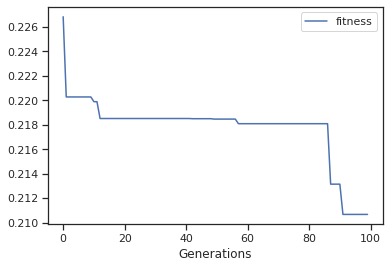

time: 142 ms (started: 2022-06-23 08:25:31 +00:00)


In [ ]:
fitness_values = [row[0] for row in history]
fitness_values = pd.DataFrame(fitness_values, columns=['fitness'])
fitness_values = fitness_values.rename_axis('Generations')
fitness_values.plot()
plt.show()

## Results

In [ ]:
best_weights = ga.best[1]
best_weights

[0.0007041275242272982,
 0.0,
 9.089516808142743e-05,
 0.00046705949020141356,
 0.0,
 0.00045842693849923563,
 4.384417618462923e-05,
 0.0003889284779036229,
 7.522967835549394e-05,
 0.0005036926376752415,
 0.00042799904622138873,
 0.0007623441492102854,
 0.0004776243585486741,
 0.000555243482611325,
 6.948634342258424e-05,
 0.0002951644979508925,
 1.2397578268876536e-05,
 0.00010305787320345988,
 0.0004475852962081869,
 0.0003154469837772187,
 0.00035636303872832106,
 0.0002241376148866334,
 0.00045873080810847225,
 0.000314076622640664,
 7.019091545258756e-05,
 0.0002690386725342091,
 0.00025366495725052756,
 0.0001754834481104294,
 0.0003293330294354315,
 0.00042090471929603733,
 0.000402638986503966,
 0.33959184781526525,
 6.917750035921915e-05,
 0.0002993816619242671,
 0.0,
 0.0003862709452984046,
 3.118785808948264e-05,
 0.00047646896362609235,
 5.105170982068537e-05,
 0.00012009812038632553,
 0.00020180778708902872,
 0.0001438019706992658,
 5.574390993831159e-05,
 0.000447012588

time: 8.78 ms (started: 2022-06-23 08:26:05 +00:00)


              precision    recall  f1-score   support

           0     0.6170    0.6591    0.6374        88
           1     0.7684    0.8769    0.8191       333
           2     0.6075    0.6768    0.6403       263
           3     0.6667    0.7200    0.6923        25
           4     0.6613    0.7196    0.6892       453
           5     0.9132    0.8168    0.8623      1288
           6     0.5342    0.6094    0.5693        64
           7     0.7143    0.7692    0.7407        26

    accuracy                         0.7807      2540
   macro avg     0.6853    0.7310    0.7063      2540
weighted avg     0.7934    0.7807    0.7847      2540



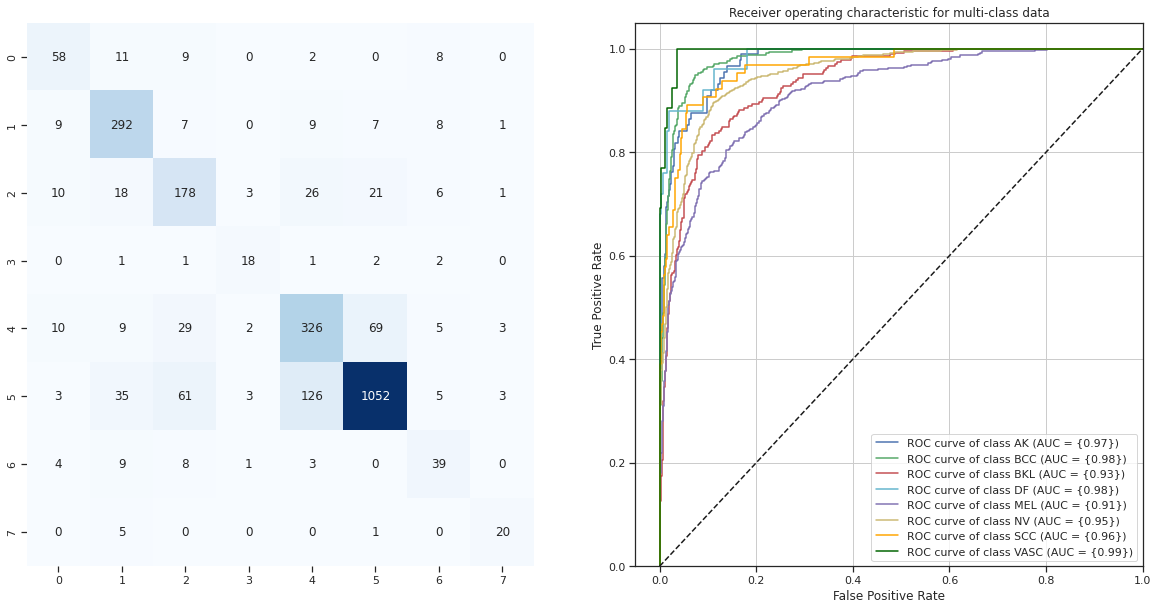

time: 5.26 s (started: 2022-06-23 08:25:37 +00:00)


In [ ]:
best_weights = ga.best[1]
results = weighted_average_scores(test_predictions, best_weights)
evaluate_ensemble(results)

## Best models (high weight)

### Save models path

In [ ]:
models_name = os.listdir(GLOBAL_MODELS_FOLDER)
models_path = []

for model_name in models_name:
  models = os.listdir(os.path.join(GLOBAL_MODELS_FOLDER, model_name))
  for m in models:
    if m.endswith('.h5'):
      models_path.append(os.path.join(GLOBAL_MODELS_FOLDER, model_name, m))

models_path = np.array(models_path)

time: 2.83 s (started: 2022-06-23 14:14:54 +00:00)


In [ ]:
best_weights = [0.0007041275242272982,
 0.0,
 9.089516808142743e-05,
 0.00046705949020141356,
 0.0,
 0.00045842693849923563,
 4.384417618462923e-05,
 0.0003889284779036229,
 7.522967835549394e-05,
 0.0005036926376752415,
 0.00042799904622138873,
 0.0007623441492102854,
 0.0004776243585486741,
 0.000555243482611325,
 6.948634342258424e-05,
 0.0002951644979508925,
 1.2397578268876536e-05,
 0.00010305787320345988,
 0.0004475852962081869,
 0.0003154469837772187,
 0.00035636303872832106,
 0.0002241376148866334,
 0.00045873080810847225,
 0.000314076622640664,
 7.019091545258756e-05,
 0.0002690386725342091,
 0.00025366495725052756,
 0.0001754834481104294,
 0.0003293330294354315,
 0.00042090471929603733,
 0.000402638986503966,
 0.33959184781526525,
 6.917750035921915e-05,
 0.0002993816619242671,
 0.0,
 0.0003862709452984046,
 3.118785808948264e-05,
 0.00047646896362609235,
 5.105170982068537e-05,
 0.00012009812038632553,
 0.00020180778708902872,
 0.0001438019706992658,
 5.574390993831159e-05,
 0.0004470125886667861,
 0.0006114014288100064,
 0.000320816569893073,
 0.000195782373441208,
 0.00028166128349923494,
 0.0004895335963170119,
 0.00040135853581675017,
 0.00043349684415068307,
 0.0005290685736373617,
 0.00048339808042555533,
 0.00032297767437598665,
 0.00021700011297645538,
 0.00010008655479231252,
 0.0002189538696076673,
 0.0002775631897631648,
 0.0005865537851722484,
 0.0034092075585372395,
 0.0,
 0.0009512717590991252,
 0.022927494406416362,
 0.0,
 0.003329517042813917,
 0.00046688569651813993,
 0.0011162809165801394,
 0.019520552966673415,
 0.019144671759074288,
 0.017168168567301304,
 0.0005353207697873542,
 0.0077587737018249186,
 0.015597924225224541,
 0.01845263197968719,
 0.008062954058121583,
 0.003993513484968278,
 0.009229396516727335,
 0.016886324641833598,
 0.007834880426032474,
 0.009905038371831867,
 0.004297011293489053,
 0.026598346910255283,
 0.0031493873627743197,
 0.0053798535724729835,
 0.0230290343458199,
 0.012612964193926754,
 0.002531049527840578,
 0.030365901678973642,
 0.0069427529404216095,
 0.013353711865657442,
 0.028339239769754786,
 0.009448183169140917,
 0.013304014065684292,
 0.01400773567018976,
 0.0021723023111046447,
 0.00867648328443627,
 0.017307820867130008,
 0.012739442514097496,
 0.012043800715318093,
 0.013171364415914487,
 0.006766755265862667,
 0.007924851386614373,
 0.020233451987873775,
 0.001822723583375075,
 0.005633522226308319,
 0.017101925919457944,
 0.0048461096087332066,
 0.006315752202649381,
 0.017895966237270133,
 0.001278650755195683,
 0.014809127936210687,
 0.010177788387772984,
 0.01535568418774458,
 0.01490660956059174,
 0.019884396418579243,
 0.018654056317214177,
 0.0019560683225537663,
 0.002555196129774953,
 0.009055183560890799]
best_models = np.argsort(np.array(best_weights))[-5:]
worst_models = np.argsort(np.array(best_weights))[:10]

time: 176 ms (started: 2022-06-23 14:09:08 +00:00)


In [ ]:
best_models_path = models_path[best_models]
worst_models_path = models_path[worst_models]

time: 907 µs (started: 2022-06-23 14:14:58 +00:00)


In [ ]:
worst_models_path

array(['/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/MobileNet/mobileNet_3.h5',
       '/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_1.h5',
       '/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/ResNet50/ResNet50_finetuning5.h5',
       '/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/MobileNet/mobileNet_3.1.h5',
       '/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_6.h5',
       '/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_3.1.h5',
       '/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/InceptionV3/Inception_1.h5',
       '/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_8.h5',
       '/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/InceptionV3/Inception_3.h5',
       '/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models

time: 3.71 ms (started: 2022-06-23 13:10:27 +00:00)


In [ ]:
predictions = []
for m_path in best_models_path:
  print(m_path)
  model = tf.keras.models.load_model(m_path)
  dataset = val_dataset224x224
  predictions.append(model.predict(dataset))

predictions = np.array(predictions)
np.save('/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/predictions_best_models.npy', predictions, allow_pickle=True)

/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/EfficientNetB0/EfficientNet_experiment3.h5
/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/MobileNet/mobileNet_14_finetuning.h5
/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/EfficientNetB0/EfficientNet_finetuning1_1.h5
/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/EfficientNetB0/EfficientNet_experiment6.h5
/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/ResNet50/ResNet50_finetuning7.h5
time: 51.9 s (started: 2022-06-23 13:03:20 +00:00)


In [ ]:
predictions = []
for m_path in best_models_path:
  print(m_path)
  model = tf.keras.models.load_model(m_path)
  dataset = test_dataset224x224
  predictions.append(model.predict(dataset))

predictions = np.array(predictions)
np.save('/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/predictions_best_models_test.npy', predictions, allow_pickle=True)

/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/EfficientNetB0/EfficientNet_experiment3.h5
/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/MobileNet/mobileNet_14_finetuning.h5
/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/EfficientNetB0/EfficientNet_finetuning1_1.h5
/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/EfficientNetB0/EfficientNet_experiment6.h5
/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/ResNet50/ResNet50_finetuning7.h5
time: 57.3 s (started: 2022-06-23 13:48:17 +00:00)


In [ ]:
predictions_val_best = np.load('/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/predictions_best_models.npy')
predictions_test_best = np.load('/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/predictions_best_models_test.npy')
n_models = len(predictions_val_best)

time: 9.41 ms (started: 2022-06-23 13:49:18 +00:00)


In [ ]:
POPULATION_SIZE = 10 # number of individuals
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.2   # probability for mutating an individual
MAX_GENERATIONS = 100

time: 1.45 ms (started: 2022-06-23 13:23:17 +00:00)


In [ ]:
ga = GA( 
    generation = MAX_GENERATIONS, 
    pop_size = POPULATION_SIZE, 
    chromo_size = n_models, 
    low = 0.0, 
    high = 1.0, 
    retain_rate = P_CROSSOVER, 
    mutate_rate = P_MUTATION,
    data = predictions
)

ga.fit(target = 1.0)

[0 0 0 ... 7 7 7]


time: 6.68 s (started: 2022-06-23 13:43:30 +00:00)


In [ ]:
history = ga.generation_history

time: 988 µs (started: 2022-06-23 13:43:40 +00:00)


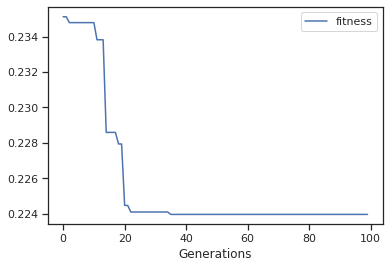

time: 220 ms (started: 2022-06-23 13:43:42 +00:00)


In [ ]:
fitness_values = [row[0] for row in history]
fitness_values = pd.DataFrame(fitness_values, columns=['fitness'])
fitness_values = fitness_values.rename_axis('Generations')
fitness_values.plot()
plt.show()

              precision    recall  f1-score   support

           0     0.5631    0.6591    0.6073        88
           1     0.7569    0.8228    0.7885       333
           2     0.5635    0.6920    0.6212       263
           3     0.6538    0.6800    0.6667        25
           4     0.6483    0.6755    0.6616       453
           5     0.9111    0.8113    0.8583      1288
           6     0.5270    0.6094    0.5652        64
           7     0.5758    0.7308    0.6441        26

    accuracy                         0.7638      2540
   macro avg     0.6499    0.7101    0.6766      2540
weighted avg     0.7803    0.7638    0.7694      2540



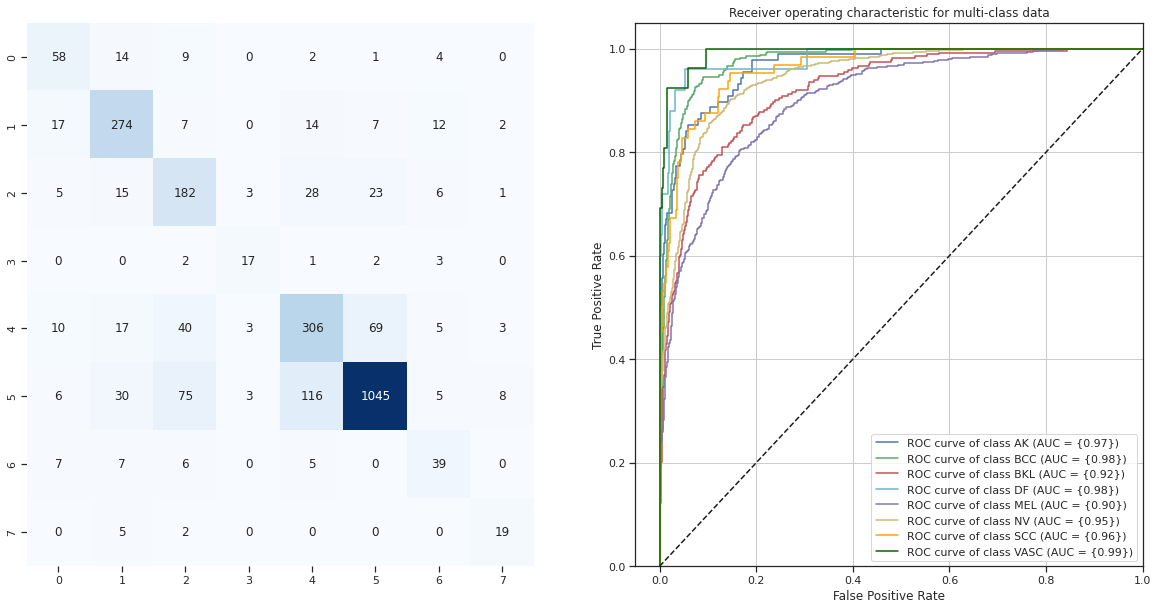

time: 5.32 s (started: 2022-06-23 13:49:36 +00:00)


In [ ]:
best_weights = ga.best[1]
results = weighted_average_scores(predictions_test_best, best_weights)
evaluate_ensemble(results)

# Stacking Ensemble

In [ ]:
inputs224x224 = keras.Input(shape=(224, 224, 3))
best_models = []
for best_model in best_models_path:
  m = tf.keras.models.load_model(best_model)
  m.trainable = False
  m._name = best_model.split("/")[-1]
  best_models.append(m(inputs224x224))

time: 22 s (started: 2022-06-23 14:15:04 +00:00)


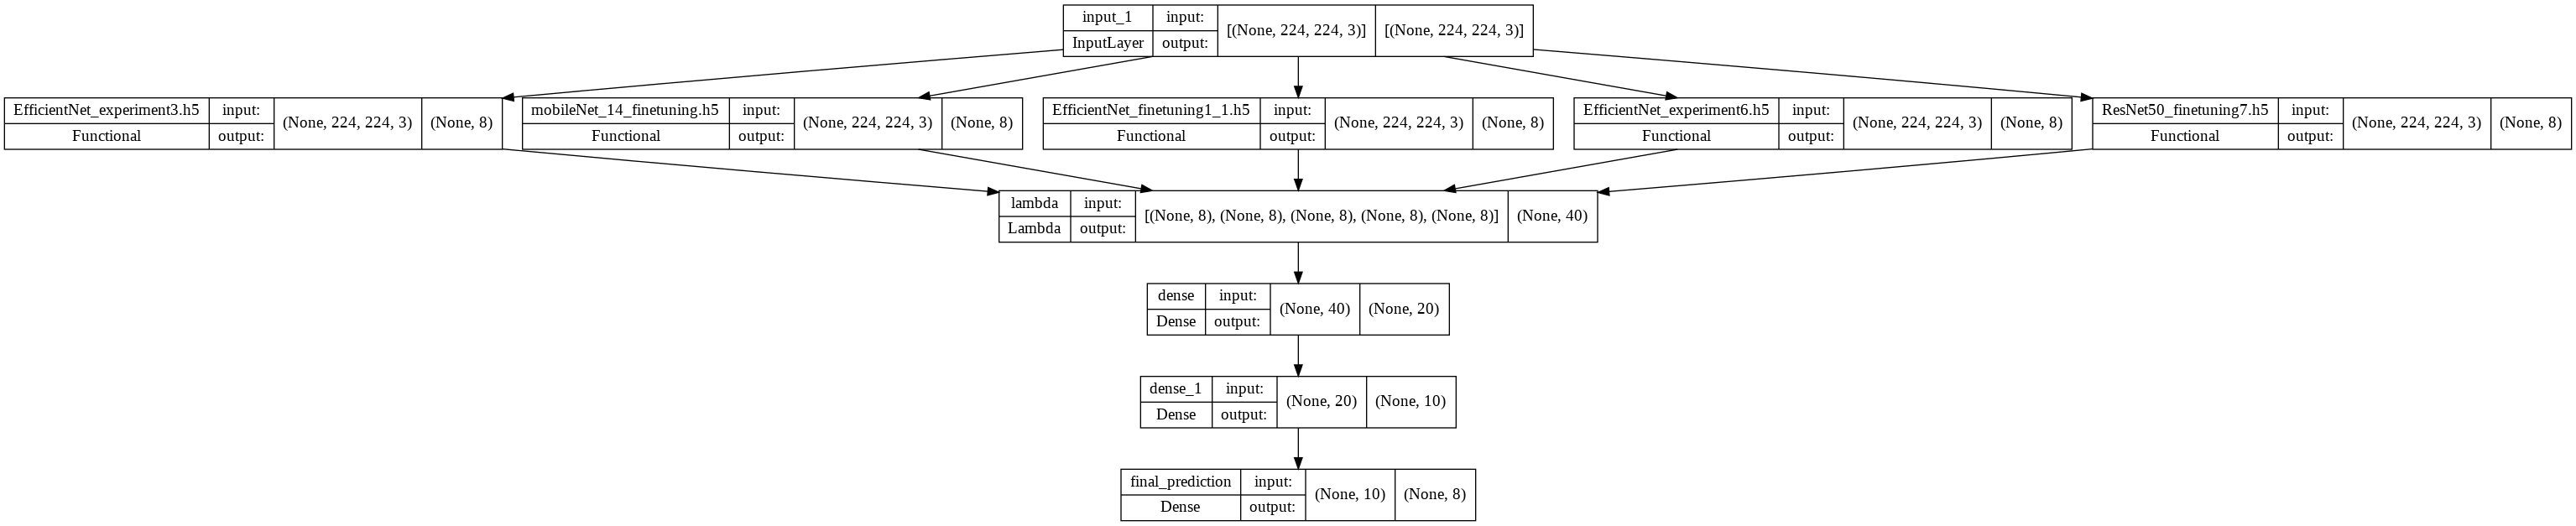

time: 372 ms (started: 2022-06-23 14:15:26 +00:00)


In [ ]:
from keras.layers.core import Lambda
from keras import backend as K

L1_layer = Lambda(lambda tensors:K.concatenate(tensors))
L1_concat = L1_layer(best_models)

dense1 = tf.keras.layers.Dense(20, activation='relu')(L1_concat)
dense2 = tf.keras.layers.Dense(10, activation='relu')(dense1)
prediction = tf.keras.layers.Dense(8, activation='softmax', name='final_prediction')(dense2)

stack_model = tf.keras.models.Model(inputs=[inputs224x224],outputs=prediction)

#concatenated = tf.keras.layers.concatenate([mobilenet_model, scratch_model, resnet50_model, resnet101_model, efficientnetB0_model, inceptionV3_model])
tf.keras.utils.plot_model(stack_model, show_shapes=True) #to_file="img.png"

In [ ]:
stack_model = compile_model(stack_model)

time: 31.9 ms (started: 2022-06-23 14:20:24 +00:00)


In [ ]:
MODELS_FOLDER = "/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/Ensemble"

history = run_model(stack_model, 'Stacked_Ensemble', train_dataset, val_dataset, MODELS_FOLDER, class_weights)

Training:   0%|           0/50 ETA: ?s,  ?epochs/s

Epoch 1/50


0/453           ETA: ?s - 

Epoch 1/50
453/453 [==============================] - ETA: 0s - loss: 1.9329 - accuracy: 0.2091
Epoch 1: val_loss improved from inf to 1.91441, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/Ensemble/Stacked_Ensemble.h5
453/453 [==============================] - 216s 404ms/step - loss: 1.9329 - accuracy: 0.2091 - val_loss: 1.9144 - val_accuracy: 0.1953 - lr: 1.0000e-04
Epoch 2/50


0/453           ETA: ?s - 

Epoch 2/50
453/453 [==============================] - ETA: 0s - loss: 1.6433 - accuracy: 0.5666
Epoch 2: val_loss improved from 1.91441 to 1.59373, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/Ensemble/Stacked_Ensemble.h5
453/453 [==============================] - 173s 379ms/step - loss: 1.6433 - accuracy: 0.5666 - val_loss: 1.5937 - val_accuracy: 0.5868 - lr: 1.0000e-04
Epoch 3/50


0/453           ETA: ?s - 

Epoch 3/50
453/453 [==============================] - ETA: 0s - loss: 1.2404 - accuracy: 0.7853
Epoch 3: val_loss improved from 1.59373 to 1.24709, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/Ensemble/Stacked_Ensemble.h5
453/453 [==============================] - 172s 379ms/step - loss: 1.2404 - accuracy: 0.7853 - val_loss: 1.2471 - val_accuracy: 0.6971 - lr: 1.0000e-04
Epoch 4/50


0/453           ETA: ?s - 

Epoch 4/50
453/453 [==============================] - ETA: 0s - loss: 0.8286 - accuracy: 0.8703
Epoch 4: val_loss improved from 1.24709 to 0.99753, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/Ensemble/Stacked_Ensemble.h5
453/453 [==============================] - 173s 381ms/step - loss: 0.8286 - accuracy: 0.8703 - val_loss: 0.9975 - val_accuracy: 0.7331 - lr: 1.0000e-04
Epoch 5/50


0/453           ETA: ?s - 

Epoch 5/50
453/453 [==============================] - ETA: 0s - loss: 0.5320 - accuracy: 0.9027
Epoch 5: val_loss improved from 0.99753 to 0.87280, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/Ensemble/Stacked_Ensemble.h5
453/453 [==============================] - 173s 380ms/step - loss: 0.5320 - accuracy: 0.9027 - val_loss: 0.8728 - val_accuracy: 0.7489 - lr: 1.0000e-04
Epoch 6/50


0/453           ETA: ?s - 

Epoch 6/50
453/453 [==============================] - ETA: 0s - loss: 0.3572 - accuracy: 0.9115
Epoch 6: val_loss improved from 0.87280 to 0.82526, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/Ensemble/Stacked_Ensemble.h5
453/453 [==============================] - 173s 380ms/step - loss: 0.3572 - accuracy: 0.9115 - val_loss: 0.8253 - val_accuracy: 0.7525 - lr: 1.0000e-04
Epoch 7/50


0/453           ETA: ?s - 

Epoch 7/50
453/453 [==============================] - ETA: 0s - loss: 0.2602 - accuracy: 0.9186
Epoch 7: val_loss improved from 0.82526 to 0.81300, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/Ensemble/Stacked_Ensemble.h5
453/453 [==============================] - 172s 379ms/step - loss: 0.2602 - accuracy: 0.9186 - val_loss: 0.8130 - val_accuracy: 0.7517 - lr: 1.0000e-04
Epoch 8/50


0/453           ETA: ?s - 

Epoch 8/50
453/453 [==============================] - ETA: 0s - loss: 0.2077 - accuracy: 0.9184
Epoch 8: val_loss did not improve from 0.81300
453/453 [==============================] - 169s 372ms/step - loss: 0.2077 - accuracy: 0.9184 - val_loss: 0.8153 - val_accuracy: 0.7505 - lr: 1.0000e-04
Epoch 9/50


0/453           ETA: ?s - 

Epoch 9/50
453/453 [==============================] - ETA: 0s - loss: 0.1794 - accuracy: 0.9201
Epoch 9: val_loss did not improve from 0.81300
453/453 [==============================] - 169s 372ms/step - loss: 0.1794 - accuracy: 0.9201 - val_loss: 0.8225 - val_accuracy: 0.7509 - lr: 1.0000e-04
Epoch 10/50


0/453           ETA: ?s - 

Epoch 10/50
453/453 [==============================] - ETA: 0s - loss: 0.1584 - accuracy: 0.9234
Epoch 10: val_loss did not improve from 0.81300
453/453 [==============================] - 169s 373ms/step - loss: 0.1584 - accuracy: 0.9234 - val_loss: 0.8317 - val_accuracy: 0.7517 - lr: 1.0000e-04
Epoch 11/50


0/453           ETA: ?s - 

Epoch 11/50
453/453 [==============================] - ETA: 0s - loss: 0.1573 - accuracy: 0.9222
Epoch 11: val_loss did not improve from 0.81300
453/453 [==============================] - 171s 376ms/step - loss: 0.1573 - accuracy: 0.9222 - val_loss: 0.8311 - val_accuracy: 0.7521 - lr: 1.0000e-05
Epoch 12/50


0/453           ETA: ?s - 

Epoch 12/50
453/453 [==============================] - ETA: 0s - loss: 0.1528 - accuracy: 0.9214
Epoch 12: val_loss did not improve from 0.81300
453/453 [==============================] - 170s 375ms/step - loss: 0.1528 - accuracy: 0.9214 - val_loss: 0.8315 - val_accuracy: 0.7521 - lr: 1.0000e-05
Epoch 12: early stopping
time: 36min 2s (started: 2022-06-23 14:20:26 +00:00)


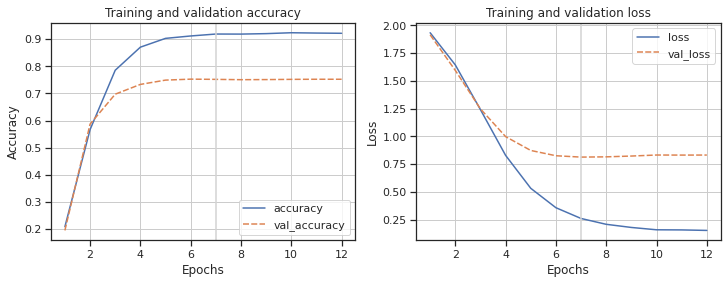

time: 1.17 s (started: 2022-06-23 15:06:28 +00:00)


In [ ]:
plot_model_performance(history, axis=0)

80/80 [==============================] - 32s 317ms/step - loss: 0.8418 - accuracy: 0.7476
Test loss: 0.842
Test accuracy: 0.748
Precision: 0.6885779280353963
Recall: 0.7002945737966307
F1-Score: 0.6895799374284206
Accuracy on Test Data: 0.75%

              precision    recall  f1-score   support

           0       0.53      0.69      0.60        88
           1       0.73      0.83      0.78       333
           2       0.61      0.64      0.63       263
           3       0.74      0.68      0.71        25
           4       0.57      0.73      0.64       453
           5       0.91      0.77      0.83      1288
           6       0.60      0.56      0.58        64
           7       0.82      0.69      0.75        26

    accuracy                           0.75      2540
   macro avg       0.69      0.70      0.69      2540
weighted avg       0.77      0.75      0.75      2540



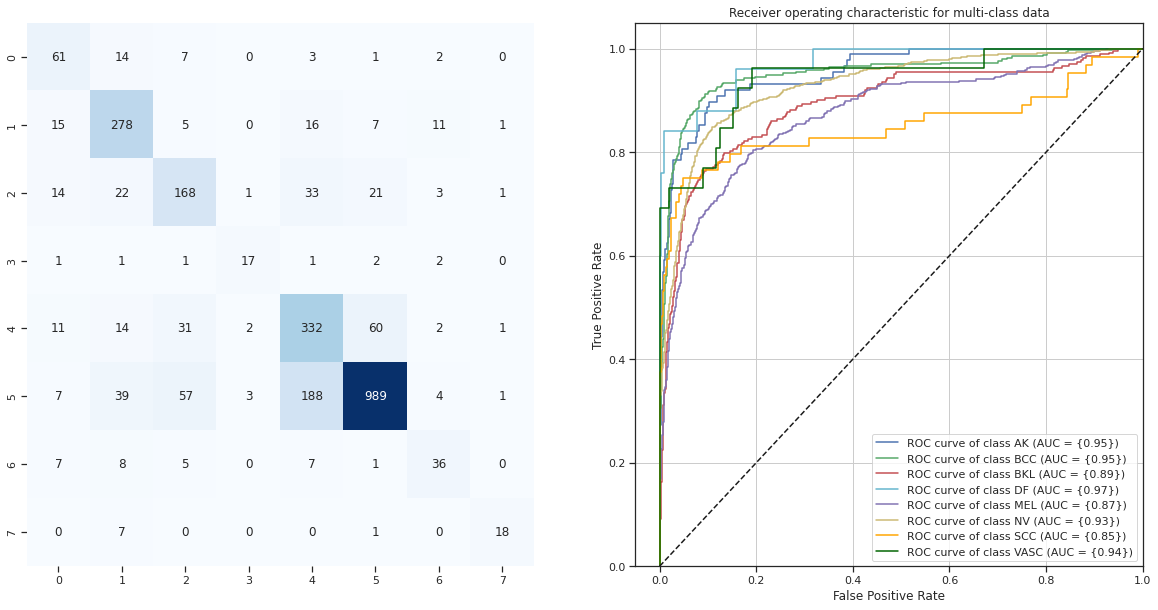

time: 2min (started: 2022-06-23 15:06:51 +00:00)


In [ ]:
evaluate_model(tf.keras.models.load_model(MODELS_FOLDER + '/Stacked_Ensemble.h5'))

In [ ]:
mobilenet = '/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/MobileNet/mobileNet_10_finetuning_block10.h5'
scratch = '/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_inception.h5'
resnet50 = '/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/ResNet50/ResNet50_finetuning8.h5'
resnet101 = '/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/ResNet101/ResNet101_finetuning1_1.h5'
efficientnetB0 = '/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/EfficientNetB0/EfficientNet_experiment6_1.h5'
inceptionV3 = '/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/InceptionV3/Inception_4_finetuning.h5'          

time: 3.44 ms (started: 2022-06-22 20:55:08 +00:00)


In [ ]:
inputs224x224 = keras.Input(shape=(224, 224, 3))
inputs299x299 = keras.Input(shape=(299, 299, 3))
inputs300x300 = keras.Input(shape=(300, 300, 3))

time: 15.6 ms (started: 2022-06-22 20:55:08 +00:00)


In [ ]:
mobilenet_model = tf.keras.models.load_model(mobilenet)
layer_name = 'mobilenetv2_1.00_224'
#mobilenet_model = mobilenet_model.get_layer(layer_name)
mobilenet_model.trainable = False
mobilenet_model._name = "mobilenet"
mobilenet_model = mobilenet_model(inputs224x224)

time: 9.61 s (started: 2022-06-22 20:55:08 +00:00)


In [ ]:
scratch_model = tf.keras.models.load_model(scratch)
scratch_model.trainable = False
scratch_model._name = "scratch"
scratch_model = scratch_model(inputs300x300)

time: 5.55 s (started: 2022-06-22 20:55:18 +00:00)


In [ ]:
resnet50_model = tf.keras.models.load_model(resnet50)
layer_name = 'resnet50_no_last_2_blocks'
resnet50_model._name = "resnet50"
#resnet50_model = resnet50_model.get_layer(layer_name)
resnet50_model.trainable = False
resnet50_model = resnet50_model(inputs224x224)

time: 10.4 s (started: 2022-06-22 20:55:23 +00:00)


In [ ]:
resnet101_model = tf.keras.models.load_model(resnet101)
layer_name = 'resnet101_no_last_2_blocks'
resnet101_model._name = "resnet101"
#resnet101_model = resnet101_model.get_layer(layer_name)
resnet101_model.trainable = False
resnet101_model = resnet101_model(inputs224x224)

time: 19.6 s (started: 2022-06-22 20:55:34 +00:00)


In [ ]:
efficientnetB0_model = tf.keras.models.load_model(efficientnetB0)
layer_name = 'efficientnetb0'
efficientnetB0_model._name = "efficientnetb0"
#efficientnetB0_model = efficientnetB0_model.get_layer(layer_name)
efficientnetB0_model.trainable = False
efficientnetB0_model = efficientnetB0_model(inputs224x224)

time: 6.28 s (started: 2022-06-22 20:55:54 +00:00)


In [ ]:
inceptionV3_model = tf.keras.models.load_model(inceptionV3)
layer_name = 'inception_v3'
inceptionV3_model._name = "inception_v3"
#inceptionV3_model = inceptionV3_model.get_layer(layer_name)
inceptionV3_model.trainable = False
inceptionV3_model = inceptionV3_model(inputs299x299)

time: 13.3 s (started: 2022-06-22 20:56:00 +00:00)


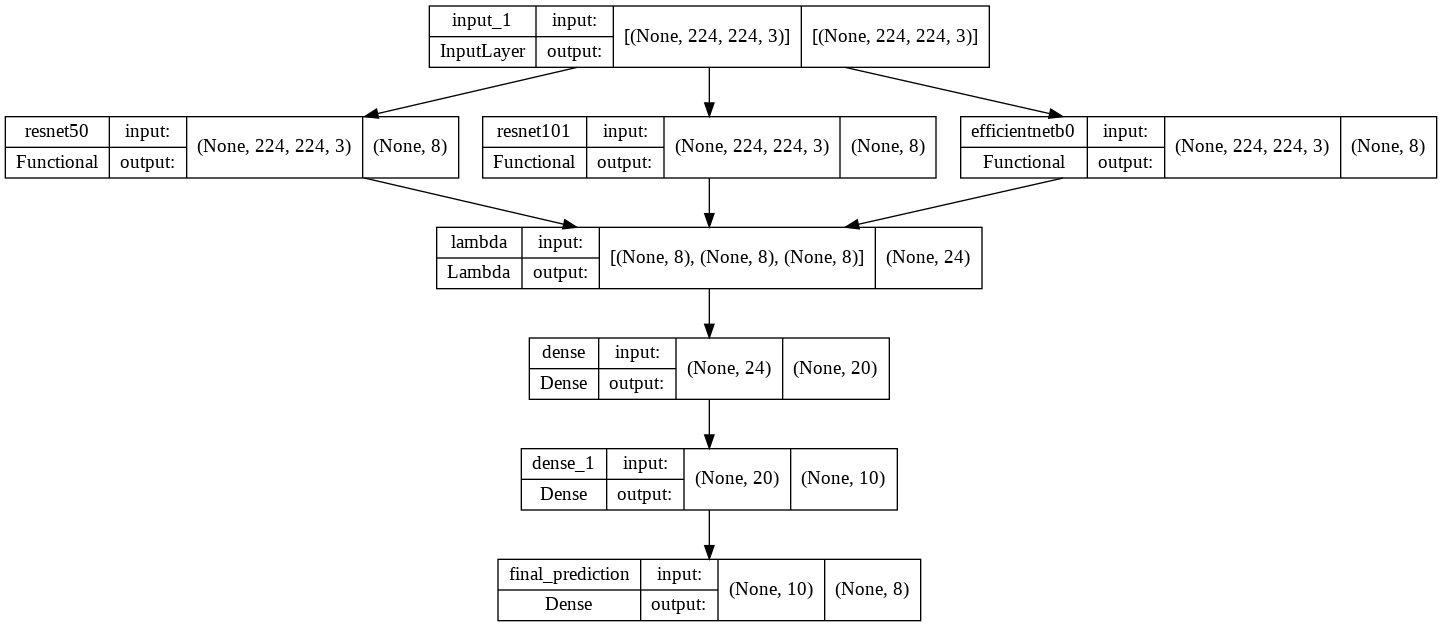

time: 304 ms (started: 2022-06-22 20:56:13 +00:00)


In [ ]:
from keras.layers.core import Lambda
from keras import backend as K

L1_layer = Lambda(lambda tensors:K.concatenate(tensors))
L1_concat = L1_layer([resnet50_model, resnet101_model, efficientnetB0_model])

dense1 = tf.keras.layers.Dense(20, activation='relu')(L1_concat)
dense2 = tf.keras.layers.Dense(10, activation='relu')(dense1)
prediction = tf.keras.layers.Dense(8, activation='softmax', name='final_prediction')(dense2)

stack_model = tf.keras.models.Model(inputs=[inputs224x224],outputs=prediction)

#concatenated = tf.keras.layers.concatenate([mobilenet_model, scratch_model, resnet50_model, resnet101_model, efficientnetB0_model, inceptionV3_model])
tf.keras.utils.plot_model(stack_model, show_shapes=True) #to_file="img.png"

In [ ]:
stack_model = compile_model(stack_model)

time: 20.2 ms (started: 2022-06-22 20:56:25 +00:00)


In [ ]:
MODELS_FOLDER = "/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/Ensemble"

history = run_model(stack_model, 'Stacked_Ensemble', train_dataset, val_dataset, MODELS_FOLDER, class_weights)

Training:   0%|           0/50 ETA: ?s,  ?epochs/s

Epoch 1/50


0/453           ETA: ?s - 

Epoch 1/50
453/453 [==============================] - ETA: 0s - loss: 1.9991 - accuracy: 0.3765
Epoch 1: val_loss improved from inf to 1.84779, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/Ensemble/Stacked_Ensemble.h5
453/453 [==============================] - 196s 380ms/step - loss: 1.9991 - accuracy: 0.3765 - val_loss: 1.8478 - val_accuracy: 0.5820 - lr: 1.0000e-04
Epoch 2/50


0/453           ETA: ?s - 

Epoch 2/50
453/453 [==============================] - ETA: 0s - loss: 1.7366 - accuracy: 0.8488
Epoch 2: val_loss improved from 1.84779 to 1.59566, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/Ensemble/Stacked_Ensemble.h5
453/453 [==============================] - 168s 370ms/step - loss: 1.7366 - accuracy: 0.8488 - val_loss: 1.5957 - val_accuracy: 0.7121 - lr: 1.0000e-04
Epoch 3/50


0/453           ETA: ?s - 

Epoch 3/50
453/453 [==============================] - ETA: 0s - loss: 1.3973 - accuracy: 0.9219
Epoch 3: val_loss improved from 1.59566 to 1.23969, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/Ensemble/Stacked_Ensemble.h5
453/453 [==============================] - 168s 370ms/step - loss: 1.3973 - accuracy: 0.9219 - val_loss: 1.2397 - val_accuracy: 0.7446 - lr: 1.0000e-04
Epoch 4/50


0/453           ETA: ?s - 

Epoch 4/50
453/453 [==============================] - ETA: 0s - loss: 0.9988 - accuracy: 0.9616
Epoch 4: val_loss improved from 1.23969 to 0.96865, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/Ensemble/Stacked_Ensemble.h5
453/453 [==============================] - 168s 370ms/step - loss: 0.9988 - accuracy: 0.9616 - val_loss: 0.9686 - val_accuracy: 0.7592 - lr: 1.0000e-04
Epoch 5/50


0/453           ETA: ?s - 

Epoch 5/50
453/453 [==============================] - ETA: 0s - loss: 0.6650 - accuracy: 0.9804
Epoch 5: val_loss improved from 0.96865 to 0.85058, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/Ensemble/Stacked_Ensemble.h5
453/453 [==============================] - 168s 370ms/step - loss: 0.6650 - accuracy: 0.9804 - val_loss: 0.8506 - val_accuracy: 0.7639 - lr: 1.0000e-04
Epoch 6/50


0/453           ETA: ?s - 

Epoch 6/50
453/453 [==============================] - ETA: 0s - loss: 0.4229 - accuracy: 0.9841
Epoch 6: val_loss improved from 0.85058 to 0.79419, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/Ensemble/Stacked_Ensemble.h5
453/453 [==============================] - 168s 370ms/step - loss: 0.4229 - accuracy: 0.9841 - val_loss: 0.7942 - val_accuracy: 0.7742 - lr: 1.0000e-04
Epoch 7/50


0/453           ETA: ?s - 

Epoch 7/50
453/453 [==============================] - ETA: 0s - loss: 0.2626 - accuracy: 0.9868
Epoch 7: val_loss improved from 0.79419 to 0.78596, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/Ensemble/Stacked_Ensemble.h5
453/453 [==============================] - 169s 372ms/step - loss: 0.2626 - accuracy: 0.9868 - val_loss: 0.7860 - val_accuracy: 0.7778 - lr: 1.0000e-04
Epoch 8/50


0/453           ETA: ?s - 

Epoch 8/50
453/453 [==============================] - ETA: 0s - loss: 0.1592 - accuracy: 0.9872
Epoch 8: val_loss did not improve from 0.78596
453/453 [==============================] - 164s 361ms/step - loss: 0.1592 - accuracy: 0.9872 - val_loss: 0.7930 - val_accuracy: 0.7790 - lr: 1.0000e-04
Epoch 9/50


0/453           ETA: ?s - 

Epoch 9/50
453/453 [==============================] - ETA: 0s - loss: 0.1019 - accuracy: 0.9880
Epoch 9: val_loss did not improve from 0.78596
453/453 [==============================] - 164s 361ms/step - loss: 0.1019 - accuracy: 0.9880 - val_loss: 0.8127 - val_accuracy: 0.7802 - lr: 1.0000e-04
Epoch 10/50


0/453           ETA: ?s - 

Epoch 10/50
453/453 [==============================] - ETA: 0s - loss: 0.0714 - accuracy: 0.9866
Epoch 10: val_loss did not improve from 0.78596
453/453 [==============================] - 164s 360ms/step - loss: 0.0714 - accuracy: 0.9866 - val_loss: 0.8380 - val_accuracy: 0.7829 - lr: 1.0000e-04
Epoch 11/50


0/453           ETA: ?s - 

Epoch 11/50
453/453 [==============================] - ETA: 0s - loss: 0.0596 - accuracy: 0.9869
Epoch 11: val_loss did not improve from 0.78596
453/453 [==============================] - 164s 360ms/step - loss: 0.0596 - accuracy: 0.9869 - val_loss: 0.8402 - val_accuracy: 0.7829 - lr: 1.0000e-05
Epoch 12/50


0/453           ETA: ?s - 

Epoch 12/50
453/453 [==============================] - ETA: 0s - loss: 0.0560 - accuracy: 0.9885
Epoch 12: val_loss did not improve from 0.78596
453/453 [==============================] - 164s 361ms/step - loss: 0.0560 - accuracy: 0.9885 - val_loss: 0.8432 - val_accuracy: 0.7833 - lr: 1.0000e-05
Epoch 12: early stopping
time: 36min 47s (started: 2022-06-22 20:56:28 +00:00)


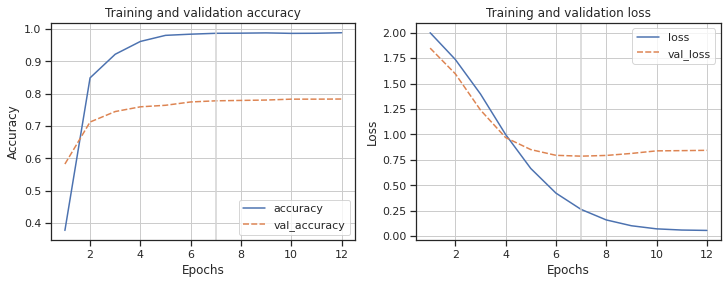

time: 858 ms (started: 2022-06-22 21:41:32 +00:00)


In [ ]:
plot_model_performance(history, axis=0)

80/80 [==============================] - 28s 304ms/step - loss: 0.8005 - accuracy: 0.7780
Test loss: 0.801
Test accuracy: 0.778
Precision: 0.714252678148553
Recall: 0.7096075196826601
F1-Score: 0.7036966220477683
Accuracy on Test Data: 0.78%

              precision    recall  f1-score   support

           0       0.78      0.53      0.64        88
           1       0.79      0.86      0.82       333
           2       0.59      0.69      0.64       263
           3       0.85      0.68      0.76        25
           4       0.63      0.75      0.69       453
           5       0.92      0.81      0.86      1288
           6       0.45      0.66      0.54        64
           7       0.69      0.69      0.69        26

    accuracy                           0.78      2540
   macro avg       0.71      0.71      0.70      2540
weighted avg       0.80      0.78      0.78      2540



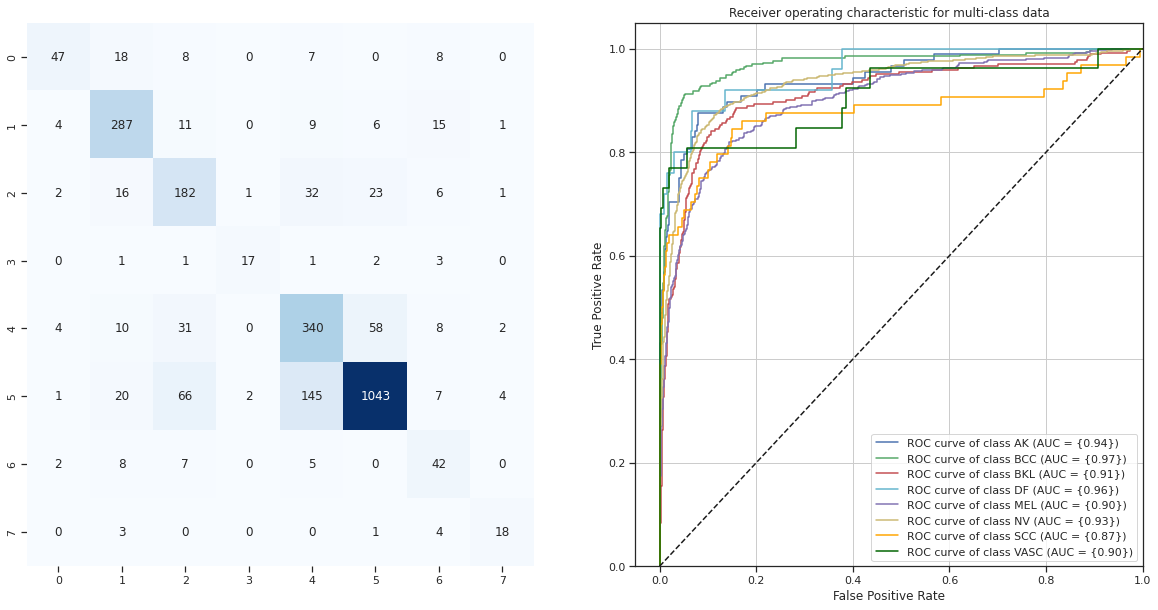

time: 1min 35s (started: 2022-06-22 21:41:44 +00:00)


In [ ]:
evaluate_model(tf.keras.models.load_model(MODELS_FOLDER + '/Stacked_Ensemble.h5'))